In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10, 6)
import theano
import theano.tensor as T
import cPickle as pickle
import os
load_path = '../../final_saved/boston/basic'
data_path = '../../../data/boston'
from plot_style import init_rc_params
init_rc_params()

heatmap

[(1e-06, -6.8562083082932697), (2.4999999999999998e-06, -4.5264162839114013), (4.9999999999999996e-06, -3.2386578704498628), (1e-05, -2.3170324438744849), (2.5e-05, nan), (5e-05, nan)]


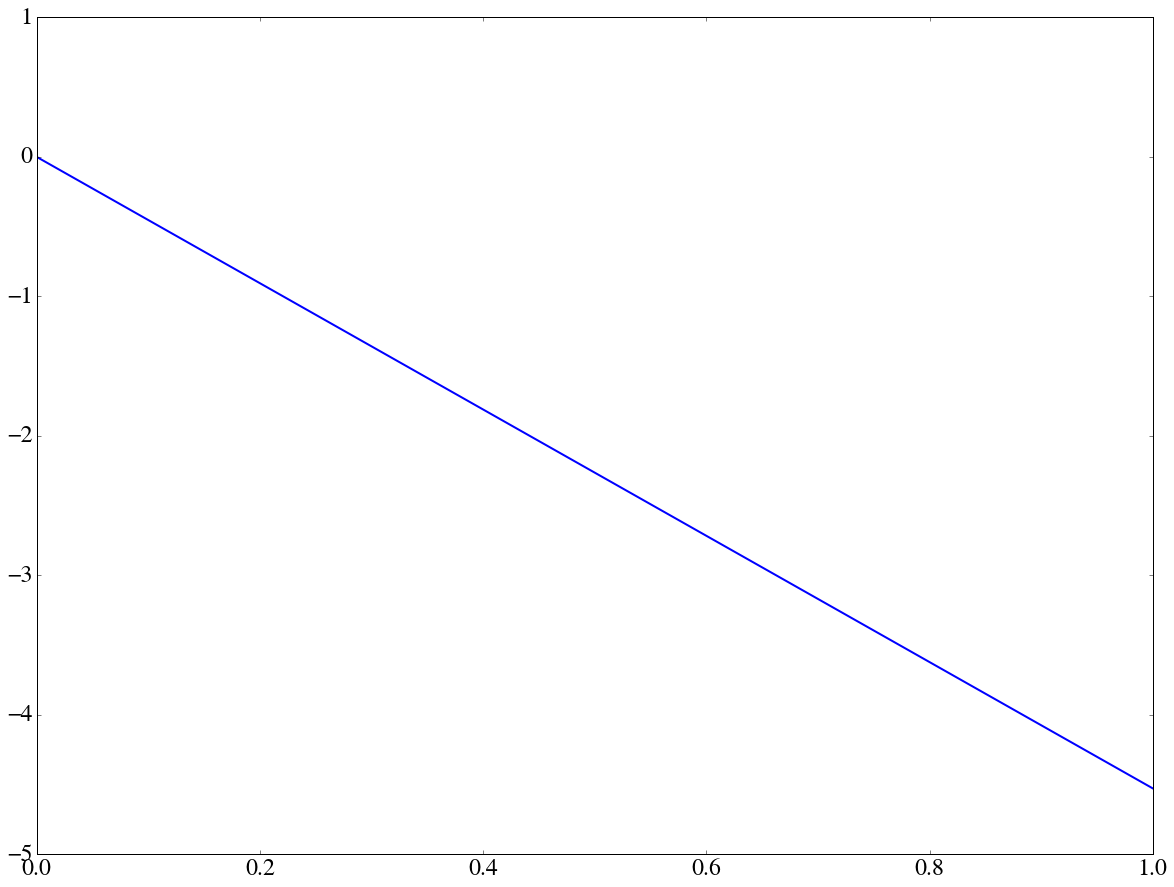

In [2]:
results = []
for f in os.listdir(load_path):
    with open(os.path.join(load_path, f), 'rb') as inp:
        data = pickle.load(inp)
        results.append((data['lr'], data['validation'][-1]))
results.sort(key =lambda x:x[0])
plt.plot([x for x in results[1]])
print results

convergence

In [3]:
with open(os.path.join(load_path, '1e-05.pckl')) as inp:
    data = pickle.load(inp)
optima = data['params'][-1]
convs = [[] for _ in range(len(optima))]
for i in xrange(len(optima)):
    for p in data['params']:
        convs[i].append(np.linalg.norm(p[i]-optima[i]))
    plt.plot(convs[i])

TypeError: unsupported operand type(s) for -: 'CudaNdarray' and 'CudaNdarray'

stability (noise in data)

In [3]:
np

NameError: name 'np' is not defined

0.0 2.31703236627 0.188080087288
0.1 14.2551698718 2.02329771606
0.2 60.8782124948 15.7181170797
0.3 137.222100088 32.7451156818
0.4 350.470321418 207.969004496
0.5 523.150136345 195.050576037
0.6 905.976564238 488.592209884
0.7 1364.15711989 674.746457271
0.8 1759.39481802 806.692118399
0.9 2307.67805375 975.816713785
1.0 3055.49435086 1665.90617115
1.1 3961.6234989 2029.46310408
1.2 4871.43942873 3181.28367019
1.3 5595.19113383 3314.39854008
1.4 6804.84544263 2963.53169145
1.5 8348.25000374 4094.95748208
1.6 9962.7658043 5837.48159578
1.7 11073.9444234 6832.68898354
1.8 12987.8622002 6690.37710961
1.9 12459.0138991 6689.40081313


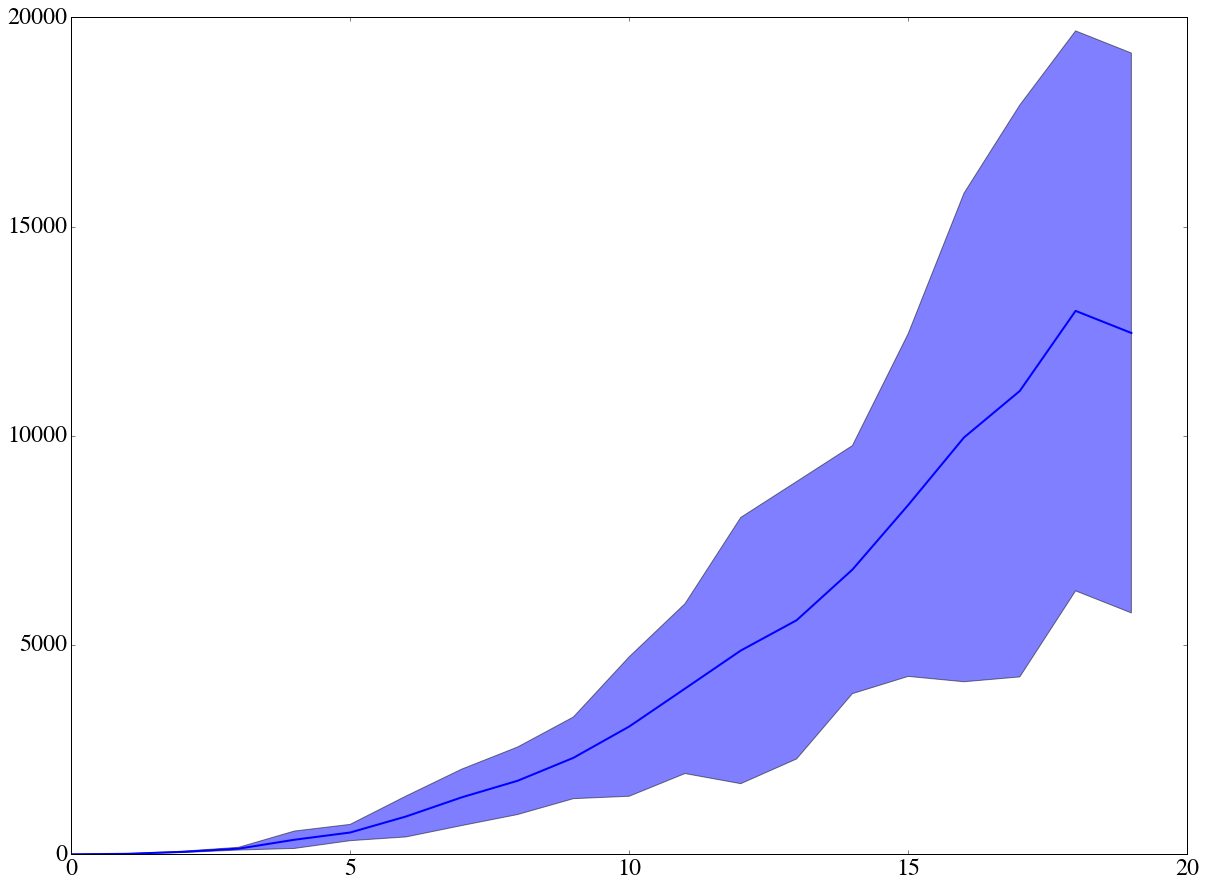

In [4]:
test_x = np.load(os.path.join(data_path, 'test_x.npy'))
test_y = np.load(os.path.join(data_path, 'test_y.npy'))
train_x = test_x
with open(os.path.join(load_path, '1e-05.pckl')) as inp:
    data = pickle.load(inp)
params = data['params'][-1]
param = T.vector()
hidden_num = 50
X = T.matrix()
Y = T.vector()
W1 = param[:train_x.shape[1]*hidden_num].reshape((test_x.shape[1],hidden_num))
W2 = param[train_x.shape[1]*hidden_num:train_x.shape[1]*hidden_num+hidden_num*hidden_num].reshape((hidden_num, hidden_num))
W3 = param[train_x.shape[1]*hidden_num+hidden_num*hidden_num:train_x.shape[1]*hidden_num+2*hidden_num**2].reshape((hidden_num,  hidden_num))
W4 = param[train_x.shape[1]*hidden_num+2*hidden_num**2:train_x.shape[1]*hidden_num+2*hidden_num**2+hidden_num].reshape((hidden_num, 1))

b1 = param[-hidden_num*3-1:-hidden_num*2-1]
b2 = param[-hidden_num*2-1:-hidden_num-1]
b3 = param[-hidden_num*1-1:-1]
b4 = param[-1:]


hidden1 =T.log(1+T.exp(T.dot(X, W1) + b1))#
hidden2 =T.log(1+T.exp(T.dot(hidden1, W2) + b2))#
hidden3 =T.log(1+T.exp(T.dot(hidden2, W3) + b3))#
output = T.dot(hidden3, W4) + b4
        
cost = T.mean((output.T - Y)**2)
monitor = theano.function([X,Y,param], cost, allow_input_downcast=True)
results =[]
results_std = []
for noise_level in range(0,20):
    result = []
    noise = noise_level*1.0/10
    for p in params:
        p = np.array(p)
        result.append(monitor(test_x + np.random.randn(test_x.shape[0],test_x.shape[1])*noise, test_y, p))
    results.append(np.mean(result))
    results_std.append(np.std(result))
    print noise, results[-1], results_std[-1]
results = np.array(results)
results_std = np.array(results_std)
plt.fill_between(range(len(results)), results-results_std, results+results_std, alpha=0.5)
plt.plot(range(len(results)), results)


stability (noise in params)

0.0 225.287379219 24.2467298969
0.1 226.073337635 30.5733723135
0.2 231.268659386 41.8883390195
0.3 260.077752726 48.9752938927
0.4 267.509427165 58.2299801164
0.5 317.914123234 82.300772677
0.6 264.917693369 81.4070949991
0.7 379.8913299 103.243846778
0.8 285.179627998 105.354833773
0.9 336.419539963 124.274197878
1.0 462.754043887 212.179847129
1.1 465.056035759 164.54888428
1.2 320.403569036 106.337779871
1.3 518.451933897 169.163895515
1.4 471.165096077 205.316578158
1.5 793.049942956 375.280499989
1.6 420.97299424 202.738400772
1.7 519.290801006 239.517934471
1.8 646.578996347 309.677539868
1.9 893.558744769 428.803567455


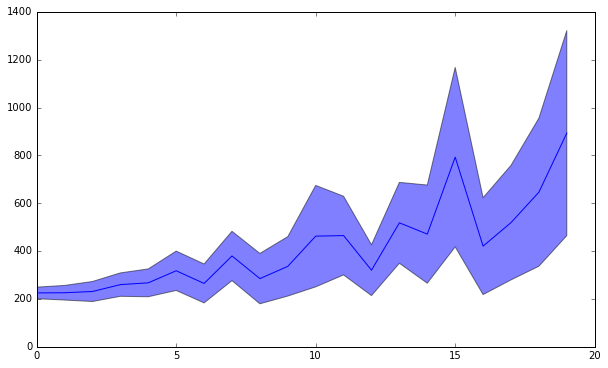

In [3]:
test_x = np.load(os.path.join(data_path, 'test_x.npy'))
test_y = np.load(os.path.join(data_path, 'test_y.npy'))
with open(os.path.join(load_path, '1e-07.pckl')) as inp:
    data = pickle.load(inp)
params = data['params'][-1]
param = T.vector()
hidden_num = 50
X = T.matrix()
Y = T.vector()
W1 = param[:test_x.shape[1]*hidden_num].reshape((test_x.shape[1],hidden_num))
b1 = param[-hidden_num-1:-1]
W2 = param[test_x.shape[1]*hidden_num:test_x.shape[1]*hidden_num+hidden_num*1].reshape((hidden_num, 1))
b2 = param[-1:]
hidden = T.tanh(T.dot(X, W1)+b1)
output = T.dot(hidden, W2) + b2
cost = T.mean((output.T - Y)**2)
monitor = theano.function([X,Y,param], cost)
results =[]
results_std = []
for noise_level in range(0,20):
    result = []
    noise = noise_level*1.0/10
    for p in params:
        result.append(monitor(test_x, test_y, p  + np.random.randn(p.shape[0])*noise))
    results.append(np.mean(result))
    results_std.append(np.std(result))
    print noise, results[-1], results_std[-1]
results = np.array(results)
results_std = np.array(results_std)
plt.fill_between(range(len(results)), results-results_std, results+results_std, alpha=0.5)
plt.plot(range(len(results)), results)


learning curve

0
50
100
150
200
250
max 1653.15227051
min 116023.380352


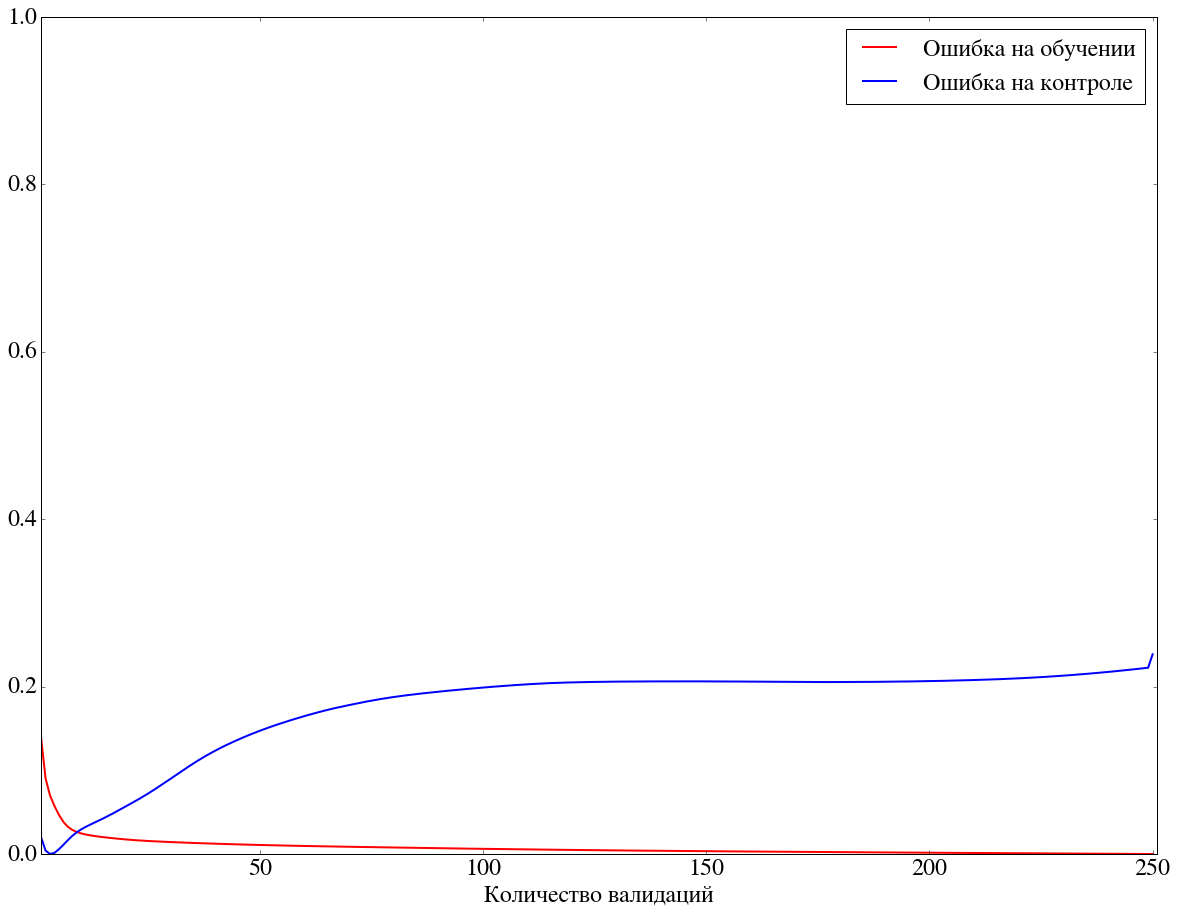

In [30]:
test_x = np.load(os.path.join(data_path, 'test_x.npy'))
test_y = np.load(os.path.join(data_path, 'test_y.npy'))

train_x = np.load(os.path.join(data_path, 'train_x.npy'))
train_y = np.load(os.path.join(data_path, 'train_y.npy'))
results_train, results_test, results_validation = [],[],[]
with open(os.path.join(load_path, '5e-05.pckl')) as inp:
    data = pickle.load(inp)
all_params = data['params']
param = T.vector()
hidden_num = 50
X = T.matrix()
Y = T.vector()
W1 = param[:test_x.shape[1]*hidden_num].reshape((test_x.shape[1],hidden_num))
b1 = param[-hidden_num-1:-1]
W2 = param[test_x.shape[1]*hidden_num:test_x.shape[1]*hidden_num+hidden_num*1].reshape((hidden_num, 1))
b2 = param[-1:]
hidden = T.log(1 + T.exp(T.dot(X, W1)+b1))
output = T.dot(hidden, W2) + b2
cost = T.sum((output.T - Y)**2)*train_x.shape[0]/X.shape[0]
monitor = theano.function([X,Y,param], cost,allow_input_downcast=True)
results =[]
results_std = []
for i,params in enumerate(all_params):
    if i%50==0:
        print i 
    result_train = []
    result_test = []    
    for p in params:
        result_train.append( monitor(train_x, train_y, p))
        result_test.append(monitor(test_x, test_y, p))
        result_validation = data['validation'][i]
    results_train.append(np.mean(result_train))
    results_test.append((np.mean(result_test)))
    results_validation.append(result_validation)

min_ = np.min([results_train, results_test])
max_ = np.max([results_train, results_test])
print 'max', min_
print 'min', max_
results_train = np.array(results_train)
results_test = np.array(results_test)
results_validation = np.array(results_validation)
results_train = (results_train - np.min(results_train)) / ((np.max(results_train) - np.min(results_train)))
results_test = (results_test - np.min(results_test)) / ((np.max(results_test) - np.min(results_test)))
results_validation = (results_validation - np.min(results_validation)) / ((np.max(results_validation) - np.min(results_validation)))
plt.plot(results_train,'r', label= u'Ошибка на обучении')
plt.plot(results_test,'b', label=u'Ошибка на контроле')
plt.legend(loc='best')
plt.xlim((1, len(results_validation)))
plt.xlabel(u'Количество валидаций', fontsize=24)

0
50
100
150
200
250


(1, 251)

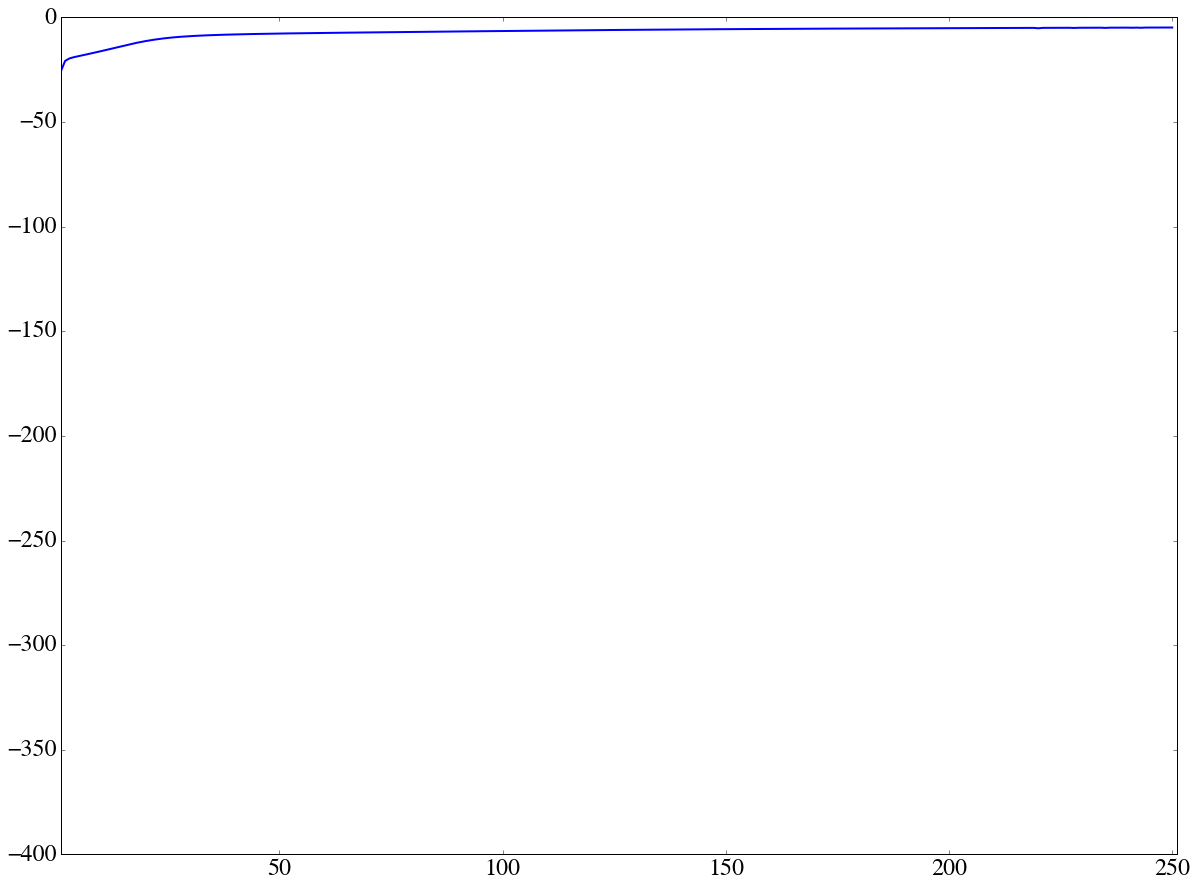

In [29]:
test_x = np.load(os.path.join(data_path, 'test_x.npy'))
test_y = np.load(os.path.join(data_path, 'test_y.npy'))

train_x = np.load(os.path.join(data_path, 'train_x.npy'))
train_y = np.load(os.path.join(data_path, 'train_y.npy'))

results_train, results_test, results_validation = [],[],[]
with open(os.path.join(load_path, '1e-05.pckl')) as inp:
    data = pickle.load(inp)
all_params = data['params']
param = T.vector()
hidden_num = 50
X = T.matrix()
Y = T.vector()
W1 = param[:test_x.shape[1]*hidden_num].reshape((test_x.shape[1],hidden_num))
b1 = param[-hidden_num-1:-1]
W2 = param[test_x.shape[1]*hidden_num:test_x.shape[1]*hidden_num+hidden_num*1].reshape((hidden_num, 1))
b2 = param[-1:]
hidden = T.tanh(T.dot(X, W1)+b1)
output = T.dot(hidden, W2) + b2
cost = T.sum((output.T - Y)**2)*train_x.shape[0]/X.shape[0]
monitor = theano.function([X,Y,param], cost, allow_input_downcast=True)
results =[]
results_std = []
for i,params in enumerate(all_params):
    if i%50==0:
        print i 
    result_train = []
    result_test = []    
    for p in params:
        result_train.append( monitor(train_x, train_y, p))
        result_test.append(monitor(test_x, test_y, p))
        result_validation = data['validation'][i]
    results_train.append(np.mean(result_train))
    results_test.append((np.mean(result_test)))
    results_validation.append(result_validation)

min_, max_ = np.min([result_train, results_test]), np.max([results_train, results_test])
results_validation = np.array(results_validation)
result_validation = (result_validation - np.min(result_validation))/ (np.max(result_validation) - np.min(result_validation))
plt.plot(results_validation)

#plt.ylim((0,100))

#plt.ylim((0,50000))